In [3]:
import os
import sys
import argparse
from os.path import dirname, realpath

sys.path.append("./src/")
sys.path.append(dirname(dirname(realpath(os.getcwd()))))
%run load_Results_12_15a.py
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_regression
from sklearn.isotonic import IsotonicRegression
#!pip install ml_insights
import ml_insights as mli


In [5]:
neg_1 = mp1 [np.where(M1['golds']==0)]
neg_2 = mp2 [np.where(M2 ['golds']==0)]
neg_3 = mp3 [np.where(M3 ['golds']==0)]
neg_4 = mp4 [np.where(M4 ['golds']==0)]

pos_1 = mp1 [np.where(M1 ['golds']==1)]
pos_2 = mp2 [np.where(M2 ['golds']==1)]
pos_3 = mp3 [np.where(M3['golds']==1)]
pos_4 = mp4 [np.where(M4 ['golds']==1)]


In [17]:
pos = pos_3
subneg = np.random.choice( neg_3, 1*sum(gold3))
p_uncalib = tp3
y_test = M_test3['golds']

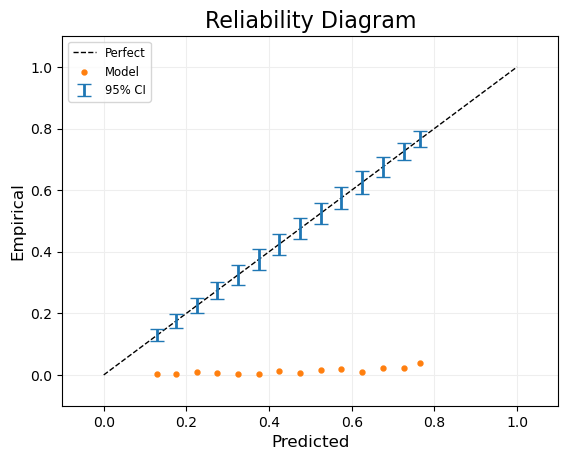

In [18]:
p_boot = np.concatenate((subneg, pos))
subgold = np.concatenate(( 0*np.ones(len(subneg) )  , 1*np.ones(len(pos)    ) ) )

spline = mli.SplineCalib()
spline.fit(p_boot, subgold)
spline_test = spline.predict(p_uncalib)

#mli.plot_reliability_diagram( subgold , boot, error_bars=False);
#tvec = np.linspace(.01, .99, 99)
#plt.plot(tvec, bc.predict(tvec))

mli.plot_reliability_diagram(y_test,  spline_test);


In [19]:
def spline_fun(pos, subneg, p_test, y_test):

    p_boot = np.concatenate((subneg, pos))
    subgold = np.concatenate(( 0*np.ones(len(subneg) )  , 1*np.ones(len(pos)    ) ) )
    
    spline = mli.SplineCalib()
    spline.fit(p_boot, subgold)
    spline_test = spline.predict(p_test)

    #mli.plot_reliability_diagram( subgold , boot, error_bars=False);
    #tvec = np.linspace(.01, .99, 99)
    #plt.plot(tvec, bc.predict(tvec))
    mli.plot_reliability_diagram(y_test,  spline_test);

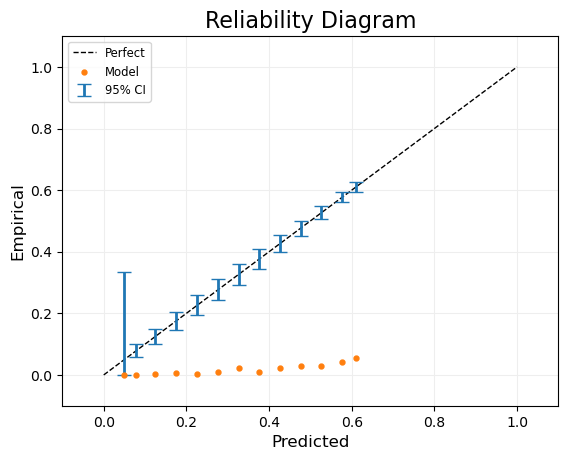

In [20]:
spline_fun(pos_1, np.random.choice(neg_1, int(1*sum(gold1))),  tp1, M_test1['golds'])

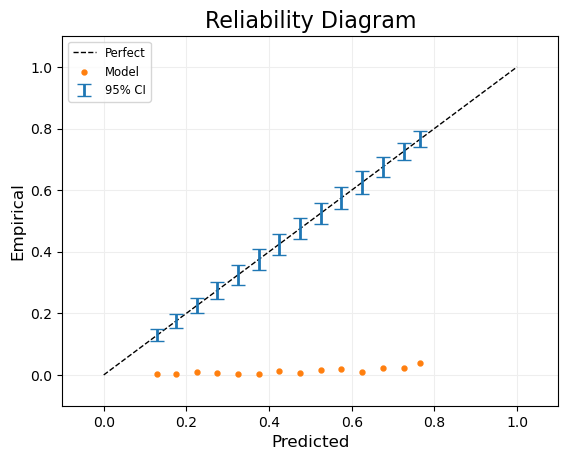

In [21]:
spline_fun(pos_3, np.random.choice(neg_3, int(1*sum(gold3))),  tp3, M_test3['golds'])

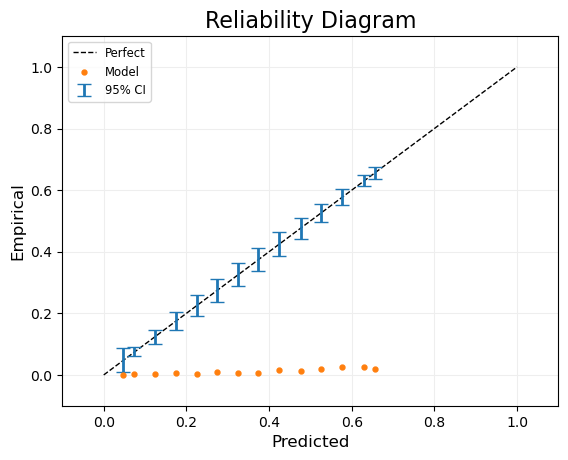

In [22]:
spline_fun(pos_2, np.random.choice(neg_2, int(1*sum(gold2))),  tp2, M_test2['golds'])

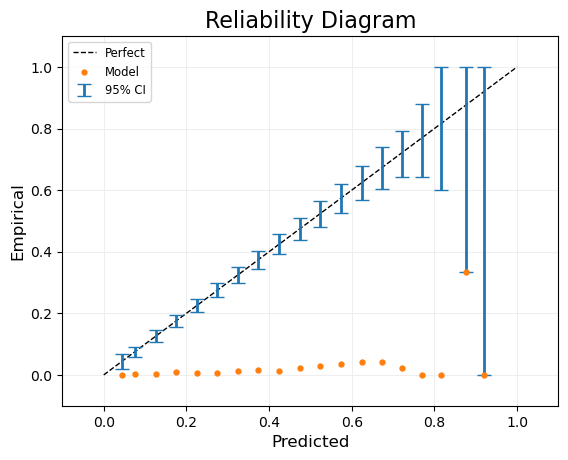

In [103]:
beta_fun(pos_3, np.random.choice(neg_3, int(2*sum(gold3))),  tp3, M_test3['golds'])

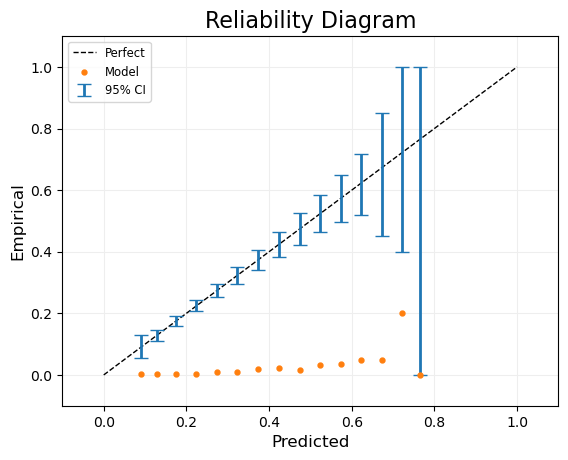

In [106]:
beta_fun(pos_4, np.random.choice(neg_4, int(2.5*sum(gold4))),  tp4, M_test4['golds'])

In [ ]:
iso =  IsotonicRegression(out_of_bounds = 'clip')
iso.fit(   (boot1), subgold1)
iso_prob = iso.predict(    (tp1))
#iso2 =isotonic2 ( logit(boot1),  subgold1,   logit(tp1) )

custom_bins_a = np.array([0,.01,.02,.03,.05, .1, .3, .5, .75, 1])

mli.plot_reliability_diagram( M_test1['golds'] ,  ( iso_prob), scaling = 'logit', 
                             bins = custom_bins_a);
tvec = np.linspace(.01, .99, 99)
#plt.plot(tvec, iso.predict( (tvec)), label='Isotonic');
plt.title('Isotonic Calibration Curve on Calibration Data');
